## ASPECT BASED TOPIC MODEELING WITH CLASSIFICATION MODELS

### INSTALLING REQUIRED LIBRARIES

In [36]:
from IPython.display import clear_output
import spacy
import pandas as pd
clear_output()


In [37]:
import pandas as pd
from google.colab import files
import nltk
import gensim
import re
import sklearn
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import spacy
import textblob
import string
import textblob
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
clear_output()

In [38]:

!pip install textblob


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
!pip install transformers
!python -m spacy download en_core_web_md 
clear_output()

In [40]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
clear_output()

In [41]:
nlp = spacy.load("en_core_web_sm")
nlp2 = spacy.load('en_core_web_md')
sp = spacy.load("en_core_web_sm")

## Reading Data

In [42]:
yelp = pd.read_csv('/content/yelp.csv')  
yelp = yelp.sample(n = 1000, random_state=42)

In [43]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0


In [44]:
print('Length of df:', len(yelp))
print('Missing value(s) from reviews:', yelp['text'].isnull().sum())

Length of df: 1000
Missing value(s) from reviews: 0


In [45]:
yelp = yelp[yelp['text'].notna()]
print('Length of df:', len(yelp))

Length of df: 1000


In [46]:
nlp = spacy.load("en_core_web_sm")

In [47]:
yelp['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [48]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0


# Basic Preprocessing

In [49]:
import re
def clean_and_split_sentences(text):
    # reaplce newline characters with space
    text = re.sub(r'\n', ' ', text)
    # remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    # lower all capital letters 
    text = text.lower()
    # to remove character that is not word
    text = re.sub(r'[^\w\s.]', '', text)
    # remove any commas followed by periods
    text = re.sub(r',\.', '.', text) 
    # Removes thesecond and subsequent periods in the sentance.
    text = re.sub(r'\.(?=.*\.)', '', text, count=2)
    return text

# apply function to text column
yelp['review_clean'] = yelp['text'].apply(clean_and_split_sentences)


In [50]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
6252,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,we got here around midnight last friday. the p...
4684,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0,brought a friend from louisiana here. she says...
1731,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0,every friday my dad and i eat here we order th...
4742,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2,my husband and i were really really disappoint...
4521,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0,love this place was in phoenix 3 weeks for wor...


Result: text has been pre-processed , and removed all new line characters , extra spaces and retained just one period appearing first , subsequent periods are removed(e.g ...) . all text was converted to lower case

## Splitting review_clean into sentaces

In [51]:
import pandas as pd

# Split the text column into a list of sentences
yelp['review_clean'] = yelp['review_clean'].str.split('.')

# Create a new row for each sentence
yelp = yelp.explode('review_clean')

# Reset the index of the dataframe
yelp = yelp.reset_index(drop=True)

# Print the resulting dataframe
#print(df)


In [52]:
yelp.head(15)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
0,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,we got here around midnight last friday
1,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,the place was dead
2,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,however they were still serving food and we e...
3,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,service was friendly quality cocktails were s...
4,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,it being located in a somewhat commercial are...
5,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,from what my friends tell me this is a great...
6,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,update great patio for daydrinking on the we...
7,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0,brought a friend from louisiana here
8,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0,she says that the crawfish etouffee here is t...
9,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0,every friday my dad and i eat here we order th...


Result: preprocssesd reviews has been split into seperate sentances using period as seperator , but there are rows with no words in it 

## Dropping rows with only  white spaces or no words in it

In [53]:
# Drop rows with empty or whitespace-only text
yelp = yelp.drop(yelp[yelp['review_clean'].str.strip().eq('')].index)


In [54]:
yelp.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
8820,tr4L9VWmPGZtdBD-L2Pofw,2010-02-23,UJh5uWBq-wi8rWXdyO1c2w,3,"I've heard about this place being ""the best"" b...",review,i-kPcHFEXraUB77-0u60uw,0,0,0,my boyfriend said he wouldnt go back but ill ...
8822,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,i registered at both the combo toys r usbabies...
8823,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,you get lots of coupons too once you sign up ...
8825,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,which have a rocker sofa and changing tables a...
8826,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,great for breastfeeding discreetly


Result: dropped rows with empty spaces  or no text in it (based on review_clean)

## Tokenizationa and further preprocessing

In [55]:

# Then you can use the list of stop words as follows:
stop_words = stopwords.words('english')

def normalize_document(doc):
    # correct spelling errors
    #doc = str(textBlob(doc).correct())
    # tokenize document
    tokens = word_tokenize(doc)
    # remove punctuation
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    # remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # join filtered tokens into a document string
    doc = ' '.join(filtered_tokens)
    
    return doc

In [56]:
yelp['review_clean'] = yelp['review_clean'].apply(normalize_document)

In [57]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
0,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,got around midnight last friday
1,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,place dead
2,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,however still serving food enjoyed well made p...
3,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,service friendly quality cocktails served atmo...
4,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,located somewhat commercial area see empty lat...


In [58]:
yelp.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
8820,tr4L9VWmPGZtdBD-L2Pofw,2010-02-23,UJh5uWBq-wi8rWXdyO1c2w,3,"I've heard about this place being ""the best"" b...",review,i-kPcHFEXraUB77-0u60uw,0,0,0,boyfriend said wouldnt go back ill give anothe...
8822,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,registered combo toys r usbabies r us store ho...
8823,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,get lots coupons sign rewards program come rea...
8825,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,rocker sofa changing tables well wipes diapers...
8826,t-jzbX3Qh-W8vikXexmkGw,2012-10-02,VpJ7UzZKDy27kpvwX1GoXQ,4,I registered at both the combo Toys R Us/Babie...,review,EeSBXLMh3CvjSqBpJWT9gw,0,0,0,great breastfeeding discreetly


Result: split the snetnace into words and removed stop words, numbers and punctautions , but still there are words with just 1 or 2 characters 

# Removing words with one or 2 characters

In [59]:

# define a function for preprocessing and tokenization
def preprocess(text):
    # simple preprocessing
    tokens = simple_preprocess(text, deacc=True, min_len=3, max_len=15)
    # join tokens into a single string
    #tokens = ' '.join(tokens)

    #Bigrams
    #bigram = Phrases([tokens], min_count=5, threshold=50)
    #bigram_tokens = bigram[tokens]
    # return list of tokens
    return tokens

# apply the preprocessing function to the review column
final_tokens = yelp['review_clean'].apply(preprocess).tolist()

# create dictionary of unique tokens
dictionary = Dictionary(final_tokens)


In [60]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
0,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,got around midnight last friday
1,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,place dead
2,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,however still serving food enjoyed well made p...
3,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,service friendly quality cocktails served atmo...
4,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,located somewhat commercial area see empty lat...


# Dictionary intilization

In [61]:

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Removing less and more frequent words 

In [62]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
#dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

In [63]:
# create a dictionary that maps the word to its index in the dictionary
index2word = {index: word for word, index in dictionary.token2id.items()}

# create bag of words representation for each document
corpus = [dictionary.doc2bow(doc) for doc in final_tokens]


In [64]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 598
Number of documents: 7000


In [65]:
yelp.shape

(7000, 11)

## LDA Modelling
Refernce:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#14computemodelperplexityandcoherencescore

https://www.degruyter.com/document/doi/10.1515/jisys-2018-0299/html?lang=en

https://www.cs.cornell.edu/home/cardie/papers/masa-sentire-2011.pdf

In [66]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 4
chunksize = 1500
passes = 20
iterations = 300
eval_every = -1  

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=42
)

In [67]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -6.148274298155611


In [68]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)


Coherence Score:  -4.20398868628545


In [69]:
# Create a list of tuples containing the topic ID, word, and relevance score for each word in each topic.
topic_word_scores = []
for topic_id, topic_terms in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    for word, relevance_score in topic_terms:
        topic_word_scores.append((topic_id, word, relevance_score))

# Convert the list of tuples to a pandas DataFrame.
df_topic_word_scores = pd.DataFrame(topic_word_scores, columns=['Topic', 'Word', 'Relevance Score'])

# Display the resulting DataFrame.
#print(df_topic_word_scores)
df_topic_word_scores.head(50)


,Topic,Word,Relevance Score
0,0,back,0.031619
1,0,like,0.024864
2,0,try,0.020857
3,0,one,0.020720
4,0,staff,0.020409
5,0,going,0.017816
6,0,would,0.014759
7,0,way,0.014671
8,0,make,0.014595
9,0,say,0.014400


ANS: Topic one doesnt ahve very good words,, so i will preprocess data again to remove custom stop words

In [70]:
# Loop over each topic in the LDA model.
for i in range(num_topics):
    # Get the top words and their weights for the topic.
    top_words = lda_model.show_topic(i, topn=30)
    # Convert the top words and their weights to a string.
    top_words_str = ' + '.join(['{:.3f} {}'.format(w, word) for word, w in top_words])
    # Print the top words and their weights for the topic.
    print('Topic {}: {}'.format(i, top_words_str))

Topic 0: 0.032 back + 0.025 like + 0.021 try + 0.021 one + 0.020 staff + 0.018 going + 0.015 would + 0.015 way + 0.015 make + 0.014 say + 0.014 come + 0.012 cant + 0.012 think + 0.012 wait + 0.011 time + 0.011 give + 0.011 ill + 0.010 want + 0.010 youre + 0.010 wasnt + 0.010 check + 0.010 feel + 0.010 need + 0.009 next + 0.009 could + 0.009 tried + 0.009 eat + 0.008 never + 0.008 place + 0.008 beer
Topic 1: 0.055 good + 0.049 food + 0.029 great + 0.024 service + 0.022 really + 0.018 like + 0.017 also + 0.016 well + 0.015 always + 0.015 nice + 0.013 restaurant + 0.012 chicken + 0.012 order + 0.011 delicious + 0.011 friendly + 0.010 even + 0.010 something + 0.010 didnt + 0.009 sauce + 0.009 fresh + 0.009 ordered + 0.009 everything + 0.009 menu + 0.008 pretty + 0.008 little + 0.008 big + 0.008 came + 0.007 salad + 0.007 find + 0.007 bad
Topic 2: 0.052 place + 0.026 get + 0.024 love + 0.019 dont + 0.016 know + 0.015 much + 0.015 would + 0.014 great + 0.014 new + 0.012 little + 0.012 around

In [71]:
!pip install pyldavis
clear_output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 24.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


<function IPython.core.display.clear_output(wait=False)>

In [72]:
### 5. Visualize the results of the LDA visually

import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


## Topic 1 -  talks about food or taste
 
## topic - 2 -talks  place/ambience


## Topic -3 contians lot of stop words,[would', 'one', "ill", "that's", 'ive', "since", "also", "else", "bbq", "still", "wasn't", "didn't", "also", "way", "lot", "still", "said", "something", "thing", "one"] this topic doesnt make any sense , need to be improved

## Topic 4 - service/experience , contians stop words

##Coherence score is -4.2

#overall , topic 1 and 2 makes sense, but 3 and 4 contains lot of stop words 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Removing  stop words and words doesnt make much sense
## and rerunning model

In [73]:

#def preprocess_again (text, stop_words):
    # simple preprocessing
    #tokens = simple_preprocess(text, deacc=True, min_len=3, max_len=15)
    #return tokens
#stop_words = ['would', 'one', "ill","thats",'ive',"since","also","else","bbq","still","wasnt","didnt","also","way","lot","still","said","something","thing","one",""]
#final_tokens = yelp['review_clean'].apply(preprocess_again, stop_words=stop_words).tolist()


nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['would', 'one', "ill", "that's", 'ive', "since", "also", "else","dont","see" "bbq", "still", "wasn't","wasnt" "didnt", "also", "way", "lot", "still", "said", "something", "thing", "one", ""])

def preprocess_again(text):
    # tokenize text
    tokens = word_tokenize(text.lower())
    
    # remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # filter out short and long tokens
    tokens = [token for token in tokens if len(token) >= 3 and len(token) <= 15]
    
    return tokens

final_tokens = yelp['review_clean'].apply(preprocess_again).tolist()

# dictionary
# create dictionary of unique tokens
dictionary = Dictionary(final_tokens)
# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# create a dictionary that maps the word to its index in the dictionary
index2word = {index: word for word, index in dictionary.token2id.items()}

# create bag of words representation for each document
corpus = [dictionary.doc2bow(doc) for doc in final_tokens]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))





/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of unique tokens: 584
Number of documents: 7000


In [74]:
yelp.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_clean
0,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,got around midnight last friday
1,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,place dead
2,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,however still serving food enjoyed well made p...
3,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,service friendly quality cocktails served atmo...
4,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2,located somewhat commercial area see empty lat...


## modifying data frame 
* to keep required columns
* to have final cleaned review column in dataframe

In [75]:


#saving into different data frame 
yelp1=yelp[["review_id","text","review_clean","stars" ,"cool","useful","funny"]]

# re ordering columns
yelp1 = yelp1.loc[:, ["review_id","text","review_clean","stars", "cool", "useful", "funny"]]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
yelp1.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,text,review_clean,stars,cool,useful,funny
0,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,got around midnight last friday,4,5,5,2
1,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,place dead,4,5,5,2
2,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,however still serving food enjoyed well made p...,4,5,5,2
3,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,service friendly quality cocktails served atmo...,4,5,5,2
4,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,located somewhat commercial area see empty lat...,4,5,5,2


## Running model again after removing stopwords

In [ ]:
#running aigain
# Set training parameters.
num_topics = 4
chunksize = 1500
passes = 20
iterations = 300
eval_every = -1  

lda_model_new = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=42
)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_data = gensimvis.prepare(lda_model_new, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# topic 1 : service

# Topic 2: atmosphere

# topic 3:  food

# topi 4 : place , didnt make much sense

# stop words issue is solved

# coherence score slightly lower than model1

In [ ]:
# coherence and perplexity
coherence_model_lda = CoherenceModel(model=lda_model_new, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

#perplexity

print('\nPerplexity: ', lda_model_new.log_perplexity(corpus))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  -4.7498079761283005

Perplexity:  -6.109872466475424


## Hyper tuning and runninf new model 

In [ ]:
#Hypertuning
num_topics = 4
chunksize = 1500
passes = 20
iterations = 500
eval_every = 3 # CHANGED TO 3  

lda_model_hyper = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha=10, # changed to 10
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=42
)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# coherence and perplexity
coherence_model_lda = CoherenceModel(model=lda_model_hyper, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

#perplexity

print('\nPerplexity: ', lda_model_hyper.log_perplexity(corpus))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  -3.45555157850131

Perplexity:  -6.13864181703212


In [ ]:
#visualize
vis_data = gensimvis.prepare(lda_model_hyper, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


Result: even though this model has high coherence value -3.2 compared to lda_model_new coherence value -5.2  still  words for the  topics doesnt make much sense 

# topic 1 : service

# Topic 2: food

# topic 3:  place

# topi 4 : hotel atmosphere 

# stop words issue is solved

# coherence score is after hypertuning

## still topics are not clearly identifible , confusing not making that much sense

## Optimal number of topics

In [ ]:
# definig function
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# running models with 2 to 6 topics 
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=final_tokens, start=2, limit=6, step=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


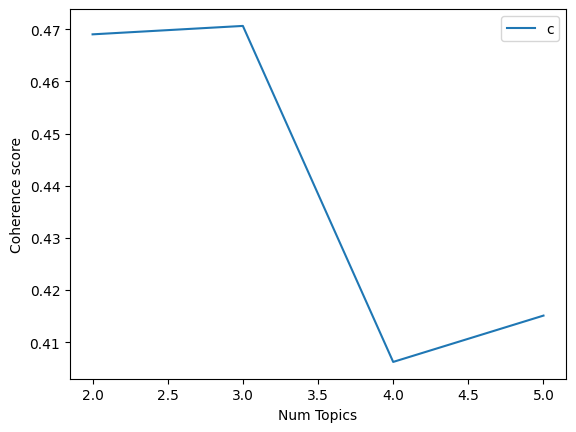

In [ ]:
# plotting coherence values v/c number of topics
import matplotlib.pyplot as plt

limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.469
Num Topics = 3  has Coherence Value of 0.4706
Num Topics = 4  has Coherence Value of 0.4062
Num Topics = 5  has Coherence Value of 0.4151


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## selecting model with 3 topics , as it has high coherance value 0.47

In [ ]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.033*"great" + 0.024*"good" + 0.022*"like" + 0.016*"food" + 0.016*"nice" + 0.016*"place" + 0.015*"service" + 0.014*"time" + 0.011*"really" + 0.008*"staff"'),
 (1,
  '0.023*"place" + 0.019*"get" + 0.017*"good" + 0.014*"back" + 0.014*"like" + 0.012*"know" + 0.012*"always" + 0.011*"time" + 0.010*"little" + 0.010*"food"'),
 (2,
  '0.028*"food" + 0.016*"place" + 0.015*"love" + 0.014*"good" + 0.013*"really" + 0.012*"pizza" + 0.010*"menu" + 0.010*"delicious" + 0.009*"came" + 0.009*"get"')]

In [ ]:
#visualizing topic distribution in the selected model
vis_data = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


# topic 1 : food 

# Topic 2: service

# topic 3: atmoshper or palce

# for 3 topics cohernece score is positive and each topics are well seperated


## similarity score for each aspects of a review

In [ ]:

# Set up column names for topics
topic_names = ["Topic" + str(i) for i in range(1, optimal_model.num_topics+1)]

# Get topic probabilities for each document
topic_probs = []
for doc in corpus:
    doc_topics = optimal_model.get_document_topics(doc)
    topic_probabilities = [0.0] * optimal_model.num_topics
    for topic in doc_topics:
        topic_probabilities[topic[0]] = topic[1]
    topic_probs.append(topic_probabilities)

# Create a pandas dataframe from the topic probabilities and topic names
df_topic_probs = pd.DataFrame(topic_probs, columns=topic_names)

# Get the dominant topic for each document
#dominant_topics = []
aspects = []
for doc in corpus:
    doc_topics = optimal_model.get_document_topics(doc)
    aspect = max(doc_topics, key=lambda x:x[1])[0] + 1
    aspects.append(aspect)

# Add the aspet to the dataframe
df_topic_probs["aspect"] = aspects

# Merge with the original dataframe
data = pd.concat([yelp1, df_topic_probs], axis=1)
data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,text,review_clean,stars,cool,useful,funny,Topic1,Topic2,Topic3,aspect
0,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,got around midnight last friday,4.0,5.0,5.0,2.0,0.595101,0.078906,0.325993,1.0
1,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,place dead,4.0,5.0,5.0,2.0,0.194431,0.610346,0.195223,2.0
2,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,however still serving food enjoyed well made p...,4.0,5.0,5.0,2.0,0.677629,0.068812,0.253559,1.0
3,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,service friendly quality cocktails served atmo...,4.0,5.0,5.0,2.0,0.787733,0.164995,0.047272,1.0
4,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,located somewhat commercial area see empty lat...,4.0,5.0,5.0,2.0,0.884697,0.059902,0.055401,1.0


In [ ]:
#reanaming columns based on visualization
main_data = data.rename(columns={'Topic1': 'food', 'Topic2':'service','Topic3':'place_ambience'})

# replace values with strings
main_data['aspect'] = main_data['aspect'].replace({1: 'food', 2: 'service', 3: 'place_ambience'})


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
main_data.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,text,review_clean,stars,cool,useful,funny,food,service,place_ambience,aspect
0,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,got around midnight last friday,4.0,5.0,5.0,2.0,0.595101,0.078906,0.325993,food
1,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,place dead,4.0,5.0,5.0,2.0,0.194431,0.610346,0.195223,service
2,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,however still serving food enjoyed well made p...,4.0,5.0,5.0,2.0,0.677629,0.068812,0.253559,food
3,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,service friendly quality cocktails served atmo...,4.0,5.0,5.0,2.0,0.787733,0.164995,0.047272,food
4,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,located somewhat commercial area see empty lat...,4.0,5.0,5.0,2.0,0.884697,0.059902,0.055401,food


## table depicts aspect of each  sentance it belongs to along with probabilty socres

In [ ]:
## Exporting this into excel
#main_data.to_excel('main_data.xlsx', index=False)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
main_data.dtypes

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review_id          object
text               object
review_clean       object
stars             float64
cool              float64
useful            float64
funny             float64
food              float32
service           float32
place_ambience    float64
aspect             object
dtype: object

### SEntiment Analsysis

In [77]:
main_note = pd.read_excel('/content/main_data.xlsx')
main_note.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,text,review_clean,stars,cool,useful,funny,food,service,place_ambience,aspect
0,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,got around midnight last friday,4.0,5.0,5.0,2.0,0.076557,0.850184,0.073258,service
1,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,place dead,4.0,5.0,5.0,2.0,0.579114,0.183258,0.237628,place_ambience
2,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,however still serving food enjoyed well made p...,4.0,5.0,5.0,2.0,0.095989,0.841916,0.062095,service
3,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,service friendly quality cocktails served atmo...,4.0,5.0,5.0,2.0,0.044728,0.079843,0.875428,place_ambience
4,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,located somewhat commercial area see empty lat...,4.0,5.0,5.0,2.0,0.622215,0.051470,0.326314,food


In [78]:
print(len(main_note))
main_note = main_note[main_note['review_clean'].notna()].reset_index(drop=True)
print(main_note.isnull().sum())
print(len(main_note))

8448
review_id            0
text                 0
review_clean         0
stars                0
cool                 0
useful               0
funny                0
food              1421
service           1421
place_ambience    1421
aspect            1421
dtype: int64
6927


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
main_note['review_clean'] = main_note['review_clean'].apply(clean_review)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [80]:
# get the general sentiment of each review
sentmt_list = []
sentmt_score = []

# loop through review
for i in range(len(main_note['review_clean'])):
  print('working on',i)
  # focus on the first 1500 words
  if len(main_note['review_clean'][i]) > 1500:
    # get the sentiment label from the output
    sentmt = sentiment_pipeline(main_note['review_clean'][i][:1500])[0]['label']
    sentmt2 = sentiment_pipeline(main_note['review_clean'][i][:1500])[0]['score']
    sentmt_list.append(sentmt.lower())
    sentmt_score.append(sentmt2)
  else:
    sentmt = sentiment_pipeline(main_note['review_clean'][i])[0]['label']
    sentmt2 = sentiment_pipeline(main_note['review_clean'][i])[0]['score']
    sentmt_list.append(sentmt.lower())
    sentmt_score.append(sentmt2)
  clear_output()

In [96]:
len(sentmt_list), len(sentmt_score)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(6927, 6927)

In [97]:
main_note['sentiment'] = sentmt_list
main_note['sentiment_Score'] = sentmt_score
main_note.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review_id,text,review_clean,stars,cool,useful,funny,food,service,place_ambience,aspect,sentiment,sentiment_Score
0,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,got around midnight last friday,4.0,5.0,5.0,2.0,0.076557,0.850184,0.073258,service,positive,0.936693
1,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,place dead,4.0,5.0,5.0,2.0,0.579114,0.183258,0.237628,place_ambience,negative,0.999770
2,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,however still serving food enjoyed well made p...,4.0,5.0,5.0,2.0,0.095989,0.841916,0.062095,service,positive,0.999669
3,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,service friendly quality cocktails served atmo...,4.0,5.0,5.0,2.0,0.044728,0.079843,0.875428,place_ambience,positive,0.989619
4,hwYVJs8Ko4PMjI19QcR57g,We got here around midnight last Friday... the...,located somewhat commercial area see empty lat...,4.0,5.0,5.0,2.0,0.622215,0.051470,0.326314,food,negative,0.998062


In [98]:
yelp_new = pd.read_csv('/content/yelp.csv')  
yelp_new = yelp_new.sample(n = 1000, random_state=42).reset_index(drop=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
# clean up the reviews columns to an extent
def clean_review(review):
  
  # lower case text, deal with certain special characters, remove excess whitespaces
  doc = review.lower()
  doc = doc.replace('-',' ')
  doc = re.sub('<[^>]+>', '', doc)
  doc = doc.replace('.','. ')
  doc = doc.strip()
  doc = re.sub("\s\s+", " ", doc)
    
  return doc

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-99-c315ce6544f1>:10: DeprecationWarning: invalid escape sequence \s
  doc = re.sub("\s\s+", " ", doc)


In [100]:
yelp_new['text'] = yelp_new['text'].apply(clean_review)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
yelp_new.head()

In [101]:
doc = nlp(yelp_new['text'][0])
for sen in list(doc.sents):
  if str(sen) != '':
    print(sen)

we got here around midnight last friday. . .
the place was dead.
however, they were still serving food and we enjoyed some well made pub grub.
service was friendly, quality cocktails were served, and the atmosphere is derived from an old uno's, which certainly works for a sports bar.
it being located in a somewhat commercial area, i can see why it's empty so late on a friday.
from what my friends tell me this is a great spot for happy hour, and it stays relatively busy thru 10pm.
*update great patio for day drinking on the weekends!


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
actual_review = []
review_sent = []
# loop through all reviews
for review in range(len(yelp_new['text'])):
  print('working on',review)
  
  # use spacy to extract sentences rom the reviews
  doc = nlp(yelp_new['text'][review])
  # loop through the sentences in each review
  for sen in list(doc.sents):
    if str(sen) != '':
      actual_review.append(yelp_new['text'][review])
      review_sent.append(str(sen))
  clear_output()

In [ ]:
len(actual_review), len(review_sent)

In [103]:
yelp2 = pd.DataFrame()
yelp2['actual'] = actual_review
yelp2['sent'] = review_sent
yelp2.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,actual,sent
0,we got here around midnight last friday. . . t...,we got here around midnight last friday. . .
1,we got here around midnight last friday. . . t...,the place was dead.
2,we got here around midnight last friday. . . t...,"however, they were still serving food and we e..."
3,we got here around midnight last friday. . . t...,"service was friendly, quality cocktails were s..."
4,we got here around midnight last friday. . . t...,it being located in a somewhat commercial area...


In [104]:
print(yelp2['actual'][1])
print(yelp2['sent'][1])

we got here around midnight last friday. . . the place was dead. however, they were still serving food and we enjoyed some well made pub grub. service was friendly, quality cocktails were served, and the atmosphere is derived from an old uno's, which certainly works for a sports bar. it being located in a somewhat commercial area, i can see why it's empty so late on a friday. from what my friends tell me this is a great spot for happy hour, and it stays relatively busy thru 10pm. *update great patio for day drinking on the weekends!
the place was dead.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
sentiment_pipeline(yelp2['sent'][65][:1500])#[0]['label']

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'label': 'POSITIVE', 'score': 0.98585444688797}]

In [106]:
# get the general sentiment of each review
sentmt_list = []
sentmt_score = []

# loop through review
for i in range(len(yelp2['sent'])):
  print('working on',i)
  # focus on the first 1500 words
  if len(yelp2['sent'][i]) > 1500:
    # get the sentiment label from the output
    sentmt = sentiment_pipeline(yelp2['sent'][i][:1500])[0]['label']
    sentmt2 = sentiment_pipeline(yelp2['sent'][i][:1500])[0]['score']
    sentmt_list.append(sentmt.lower())
    sentmt_score.append(sentmt2)
  else:
    sentmt = sentiment_pipeline(yelp2['sent'][i])[0]['label']
    sentmt2 = sentiment_pipeline(yelp2['sent'][i])[0]['score']
    sentmt_list.append(sentmt.lower())
    sentmt_score.append(sentmt2)
  clear_output()

In [108]:
yelp2['sentiment'] = sentmt_list
yelp2['sentiment_Score'] = sentmt_score
yelp2.tail()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,actual,sent,sentiment,sentiment_Score
9806,i registered at both the combo toys r us/babie...,"nice goody bag, ample selection of items.",positive,0.999848
9807,i registered at both the combo toys r us/babie...,"furniture prices are over inflated, but that s...",negative,0.991779
9808,i registered at both the combo toys r us/babie...,you get lots of coupons too once you sign up f...,positive,0.885356
9809,i registered at both the combo toys r us/babie...,there are changing tables in the restrooms as ...,positive,0.999267
9810,i registered at both the combo toys r us/babie...,"which have a rocker, sofa, and changing tables...",positive,0.989907


## Classification model

## predicting aspect of a given review 

## acedemic codes

In [109]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
main_data = main_note.copy()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
main_data['review_clean'][:10]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                      got around midnight last friday
1                                           place dead
2    however still serving food enjoyed well made p...
3    service friendly quality cocktails served atmo...
4    located somewhat commercial area see empty lat...
5    friends tell great spot happy hour stays relat...
6              update great patio daydrinking weekends
7                             brought friend louisiana
8    says crawfish etouffee best shes outside louis...
9                     every friday dad eat order thing
Name: review_clean, dtype: object

In [112]:
corpus = main_data['review_clean'][:10]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['10pm', 'area', 'around', 'atmosphere', 'bar', 'best', 'brought',
       'busy', 'certainly', 'cocktails', 'commercial', 'crawfish', 'dad',
       'daydrinking', 'dead', 'derived', 'eat', 'empty', 'enjoyed',
       'etouffee', 'every', 'food', 'friday', 'friend', 'friendly',
       'friends', 'got', 'great', 'grub', 'happy', 'hour', 'however',
       'last', 'late', 'located', 'louisiana', 'made', 'midnight', 'old',
       'order', 'outside', 'patio', 'place', 'pub', 'quality',
       'relatively', 'says', 'see', 'served', 'service', 'serving',
       'shes', 'somewhat', 'sports', 'spot', 'stays', 'still', 'tell',
       'thing', 'thru', 'unos', 'update', 'weekends', 'well', 'works'],
      dtype=object)

In [113]:
corpus = X_train[:10] #main_data['review_clean'][:10]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['additions', 'although', 'amazing', 'annoying', 'appears', 'area',
       'atmosphere', 'attentive', 'authentic', 'awesome', 'based', 'bbq',
       'best', 'bit', 'block', 'body', 'bread', 'building', 'cant',
       'center', 'chicken', 'chinese', 'choppy', 'city', 'clog', 'closed',
       'conference', 'consider', 'convention', 'could', 'day', 'decide',
       'definitely', 'delicious', 'dont', 'downtown', 'edge', 'every',
       'extra', 'fantastic', 'free', 'friendly', 'get', 'getting', 'goal',
       'golden', 'good', 'granted', 'great', 'happier', 'heart', 'heaven',
       'helpful', 'home', 'hotel', 'im', 'item', 'items', 'jus', 'know',
       'last', 'layout', 'lbs', 'little', 'location', 'locked', 'lose',
       'lost', 'lower', 'make', 'mashed', 'meal', 'meatloaf', 'months',
       'mushroom', 'music', 'new', 'number', 'occasion', 'one', 'onion',
       'orange', 'ordered', 'panda', 'parking', 'part', 'pasta', 'people',
       'phone', 'place', 'places', 'play', 'potato

In [114]:
import numpy as np

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
wpt = nltk.WordPunctTokenizer() 
stop_words = nltk.corpus.stopwords.words('english') # initialize the stop word list

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)  # re.I ignores cases, re.A matches only ASCII characters)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
norm_reviews = normalize_corpus(main_data['review_clean'])
print(len(norm_reviews))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6927


In [117]:
# Create a series to store the labels: y
y = main_data['aspect'] 

# Create a series of indices, which can be used later to reference the data
indices = np.arange(len(main_data))

# Create training and test sets
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(norm_reviews, y, indices, test_size=0.2, random_state=42)

encoder = preprocessing.LabelEncoder()

# encode the labels in the training set
y_train = encoder.fit_transform(y_train)

# encode the labels in the testing set
y_test = encoder.transform(y_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer()

# Transform the training data using only the 'text' column values: count_train 
# only on the train data!
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
# in this way we make sure that for the test data, we only consider words that are in the training set
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names_out()[:10])

['aback' 'aberration' 'ability' 'able' 'abnormally' 'abou' 'abroad'
 'absence' 'absolute' 'absolutely']


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
main_data['sent_code'] = main_data['sentiment'].replace({'positive':1, 'negative':0})

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy and auc score
score = metrics.accuracy_score(y_test, pred)
#auc = metrics.roc_auc_score(y_test, pred)

print(score)
#print(auc)

0.2922077922077922


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy and auc score: score
score = metrics.accuracy_score(y_test, pred)
#auc = metrics.roc_auc_score(y_test, pred)

print(score)
#print(auc)

0.29653679653679654


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##  NB model with count vectorizer is clealry underfiitng , may be its because of multi classification problem , need further improvemtns

In [138]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
# note that by default, the result would get normalized (so that sum of squares of row elements is 1 => penalty for longer reviews)
# let's put this off f
tfidf_vectorizer = TfidfVectorizer(norm=None)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=50, 
                         algorithm='randomized',
                         n_iter=10, random_state=42)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
from sklearn.pipeline import Pipeline
svd_transformer = Pipeline([('tfidf', tfidf_vectorizer), 
                            ('svd', svd_model)])

svd_train = svd_transformer.fit_transform(X_train)
svd_test = svd_transformer.transform(X_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
#cols = ['stars','food','service','place_ambience','sent_code']
#main_data[cols] = main_data[cols].fillna(0)
#train = np.hstack((svd_train,main_data[cols].iloc[indices_train].to_numpy()))
#test = np.hstack((svd_test,main_data[cols].iloc[indices_test].to_numpy()))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Instantiate a Random Forest classifier: rf_classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(train, y_train)

# Create the predicted tags: pred
pred = rf_classifier.predict(test)

# Obtain the training accuracy
#train_acc = rf_classifier.score(train, y_train)
#print(f"Training accuracy: {train_acc}")

# Calculate the accuracy and auc score: score
score = metrics.accuracy_score(y_test, pred)
#auc = metrics.roc_auc_score(y_test, pred)

score

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9819624819624819

## Testing accuracy with Tf-IDF , using random forest is 98%,

## may be over fitting , need to be explored further wtih feature importance

In [127]:
importances = rf_classifier.feature_importances_


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
importances = rf_classifier.feature_importances_
feature_names = list(train.columns)  # replace X with your input data

for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [128]:
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

### TRYING DIFFERENT LDA MODEL 
## MALLET LDA 

## FAILED

In [ ]:
from google.colab import files
uploaded = files.upload()


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving mallet-2.0.8.zip to mallet-2.0.8.zip


In [ ]:
!unzip mallet-2.0.8.zip


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
  inflating: mallet-2.0.8/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/mallet-2.0.8/
  inflating: __MACOSX/mallet-2.0.8/._.DS_Store  
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
   creating: __MACOSX/mallet-2.0.8/bin/
  inflating: __MACOSX/mallet-2.0.8/bin/._classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: __MACOSX/mallet-2.0.8/bin/._csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: __MACOSX/mallet-2.0.8/bin/._csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: __MACOSX/mallet-2.0.8/bin/._mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: __MACOSX/mallet-2.0.8/bin/._mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: __MACOSX/mallet-2.0.8/bin/._mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: __MACOSX/mallet-2.0.8/bin/._prepend-license.sh  
  inflating: mallet-2.0.8/bi

In [ ]:
# path to the Mallet binary file in the Colab environment
mallet_path = '/path/to/mallet-2.0.8/bin/mallet'
#code
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=id2word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim

print(gensim.__version__)


4.3.1


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gensim

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=id2word)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
main_data.head()

NameError: ignored

 ## BASIC DESCRIPTIVES OF DATA

In [ ]:
# read the entire dataset
df = pd.read_csv("/content/yelp.csv", nrows=1000)

# print and check the result
print(df.head())

#/content/yelp.csv

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

In [ ]:
##data cleaning

In [ ]:
# remove the duplicates lines
df.drop_duplicates(inplace=True)


In [ ]:
# remove all the missing value
df.dropna(inplace=True)


In [ ]:
# Convert text to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

In [ ]:
# Remove punctuation
import string

df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [ ]:
# Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


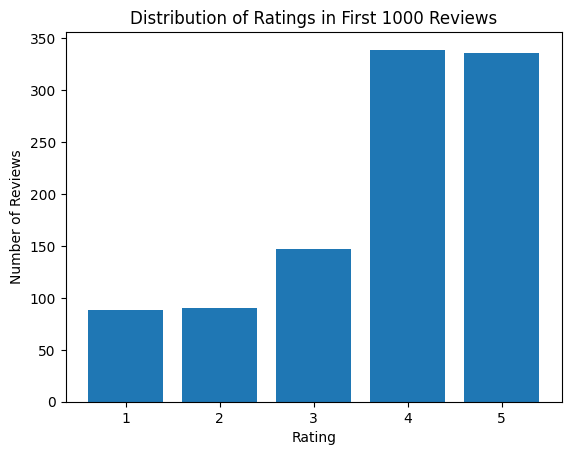

In [ ]:
# Bar chart of ratings
import matplotlib.pyplot as plt

# read the first 1000 lines of the dataset
df = pd.read_csv('yelp.csv', nrows=1000)

# count the number of reviews with each rating
rating_counts = df['stars'].value_counts()

# create a bar chart
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings in First 1000 Reviews')
plt.show()

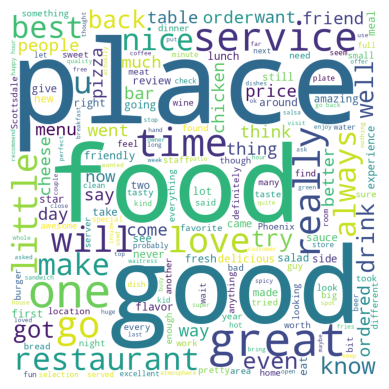

In [ ]:
# Word cloud of reviews
from wordcloud import WordCloud

# read the first 1000 lines of the dataset
df = pd.read_csv('yelp.csv', nrows=1000)

# create a word cloud of the reviews
text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


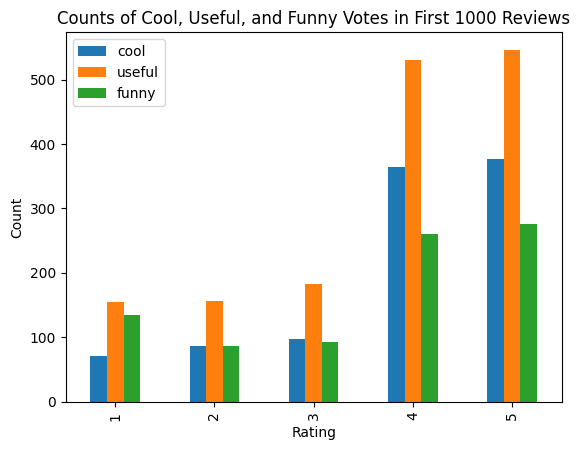

In [ ]:
# Bar chart of cool, useful, and funny counts
# read the first 1000 lines of the dataset
df = pd.read_csv('yelp.csv', nrows=1000)

# group the reviews by rating and sum up the cool, useful, and funny counts for each group
counts = df.groupby('stars')[['cool', 'useful', 'funny']].sum()

# create a grouped bar chart
counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Cool, Useful, and Funny Votes in First 1000 Reviews')
plt.show()

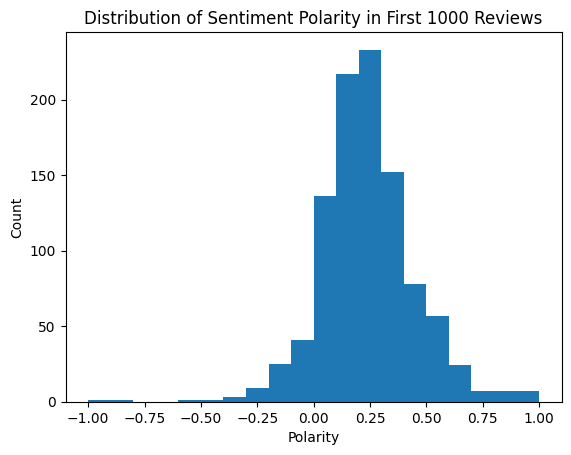

In [ ]:
# Sentiment polarity histogram
from textblob import TextBlob

# read the first 1000 lines of the dataset
df = pd.read_csv('yelp.csv', nrows=1000)

# calculate the polarity of each review
polarity = [TextBlob(text).sentiment.polarity for text in df['text']]

# create a histogram
plt.hist(polarity, bins=20)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Polarity in First 1000 Reviews')
plt.show()